In [1]:
import sys, os, pickle
sys.path.append('/home/om2382/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from torch_tools import *
from wrappers import *
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import ExponentialLR

In [61]:
### --- define task, generate inputs and outputs ('data') --- ###
i_seed = 1
np.random.seed(i_seed)
T_trial = 100
task = Context_Dependent_Decision_Task(T_trial=T_trial, input_var=0.1, report_cue=True)
N_train = 10000000
N_test = 20000
checkpoint_interval = 1
data = task.gen_data(N_train, N_test, add_dummy_end_point=False)
batched_data = add_batch_dimension_to_data(data, T_trial)

### --- initialize RNN paramters and RNN object --- ###
n_in = task.n_in
n_hidden = 32
n_out = task.n_out

W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))
b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 0.1

rnn = Torch_RNN(W_in, W_rec, W_out, b_rec, b_out,
                activation='tanh',
                alpha=alpha)

In [62]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)
scheduler = None
checkpoints = train_torch_RNN(rnn, optimizer, batched_data, batch_size=200, n_epochs=2,
                                L2_reg=0.0001, verbose=True, checkpoint_interval=checkpoint_interval, scheduler=scheduler)

Epoch 0, Batch 0
Loss 11.128576278686523
Epoch 0, Batch 50
Loss 1.9725478887557983
Epoch 0, Batch 100
Loss 1.947006344795227
Epoch 0, Batch 150
Loss 1.9238827228546143
Epoch 0, Batch 200
Loss 1.9056657552719116
Epoch 0, Batch 250
Loss 1.8634929656982422
Epoch 0, Batch 300
Loss 1.833083987236023
Epoch 0, Batch 350
Loss 1.6266181468963623
Epoch 0, Batch 400
Loss 1.3541027307510376
Epoch 0, Batch 450
Loss 1.1111608743667603
Epoch 1, Batch 0
Loss 0.9793539047241211
Epoch 1, Batch 50
Loss 0.922268807888031
Epoch 1, Batch 100
Loss 0.8977794647216797
Epoch 1, Batch 150
Loss 0.8832207918167114
Epoch 1, Batch 200
Loss 0.7566068768501282
Epoch 1, Batch 250
Loss 0.7282907962799072
Epoch 1, Batch 300
Loss 0.7077996134757996
Epoch 1, Batch 350
Loss 0.6255125403404236
Epoch 1, Batch 400
Loss 0.7821353077888489
Epoch 1, Batch 450
Loss 0.7027106285095215


In [63]:
sim = Empty_Simulation()
sim.checkpoints = checkpoints
indices = sorted([k for k in checkpoints.keys() if type(k) != str])
sim.checkpoint_interval = indices[1] - indices[0]
sim.total_time_steps = indices[-1] + sim.checkpoint_interval
sim.rnn = checkpoints['final']['rnn']

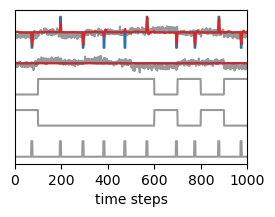

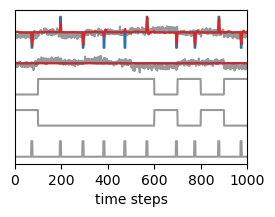

In [64]:
#Plot final checkpoint results
data = task.gen_data(0, 1000)
plot_output_from_checkpoint(sim.checkpoints['final'], data, xlim=1000)

In [65]:
file_name = 'Figure5C_example_sd1_ctx0'
task.fixed_context = 0

In [66]:
### --- SAVE RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'wb') as f:
    saved_run = {'sim': sim, 'task': task}
    pickle.dump(saved_run, f)

In [10]:
### --- OPEN RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [69]:
### -- Include geometry --- ###
topological_analysis(file_name, FP_find_FPs=True, FP_KE_criterion=0.00001, FP_N=1000,
                     FP_context=np.eye(5)[2], FP_sigma_pert=0.5,
                     compare_align_checkpoints=True, compare_aligned_graph=False,
                     compare_n_comp_window=1, compare_only=False,
                     test_N=10, test_save_data=False, compare_CKA=False,
                     compare_PC1=False, compare_PC2=True, compare_PC3=False,
                     compare_node_drift=False,
                     results_subdir='PNAS_Paper')

rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_Figure5C_example_sd1_ctx0/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/

In [77]:
###Get job status
get_ipython().system('squeue -u om2382')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1019819    lkumar  jupyter   om2382  R    2:19:31      1 ax14


In [78]:
### --- UNPACK RESULTS --- ###

file_name = 'Figure5C_example_sd1_ctx0'
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/home/om2382/learning-dynamics/results/PNAS_Paper'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices, checkpoints = unpack_analysis_results(analysis_result_path)
signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                             'n_nodes': get_checkpoint_n_stable_FPs,
                                                             'discriminant': get_checkpoint_cubic_discriminant,
                                                             'lengths': get_checkpoint_maximum_cluster_distances},
                                results_subdir='PNAS_Paper')

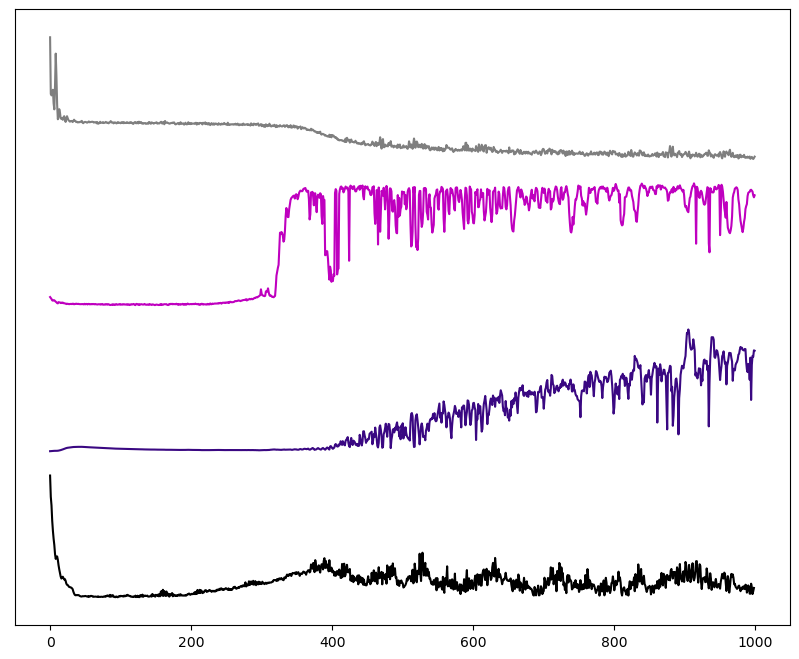

In [79]:
signals['d_loss'] = signals['test_loss'][1:] - signals['test_loss'][:-1]
fig = plot_signals(signals, x_values=indices, signal_clips={'test_loss': 1.2}, legend=False,
                   key_restriction=['test_loss', 'lengths', 'discriminant', 'rec_weight_distances'],
                   colors=['#7F7F7F', 'm', '#3A0882', 'k', '#8C564B'])
#for t in t_stage_transitions:
#    plt.axvline(x=t*10, linestyle='--', color=('0.8'))

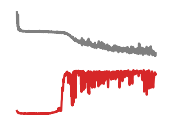

In [89]:
### --- FIGURE 5C --- ###

cm = 1/2.54
fig, ax = plt.subplots(2, 1, figsize=(5*cm, 3.5*cm))
ax[0].plot(indices, np.log10(signals['test_loss']), color='C7')
ax[1].plot(indices, signals['lengths'], color='C3')
ax[0].axis('off')
ax[1].axis('off')
fig.savefig('figs/fig5c_dynamics.pdf', format='pdf')

(-49.85, 1046.85, -0.23062844434196075, 0.27866253411575215)

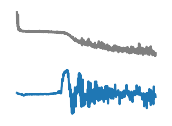

In [97]:
### --- FIGURE 5C WITH FILTERS --- ###

cm = 1/2.54
fig, ax = plt.subplots(2, 1, figsize=(5*cm, 3.5*cm))
ax[0].plot(indices, np.log10(signals['test_loss']), color='C7')
#ax[1].plot(indices, signals['lengths'], color='C3')

n_kernel = 50
y = signals['lengths'].copy()
y_clipped = y#np.clip(y, 0, 1.2)
y = np.concatenate([y_clipped[n_kernel-1:0:-1], y_clipped])
y = np.convolve(y, np.ones(n_kernel)/n_kernel, mode='valid')[:-1]
#ax[1].plot(indices[:-1], y, color='C3')
ax[1].plot(indices[:-2], y[1:] - y[:-1])
ax[0].axis('off')
ax[1].axis('off')
#fig.savefig('figs/fig5c_dynamics.pdf', format='pdf')

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(4, 2))
ax[0].plot(np.log10(signals['test_loss']), color='k')
ax[1].plot(signals['lengths'], color='C3')
ax[0].axis('off')
ax[1].axis('off')

In [ ]:
!mkdir figs/image_stack_8

In [ ]:
data = task.gen_data(0, 1000)
for i_i_cp, i_cp in enumerate(range(0, 2500, 10)):
    cp = checkpoints['checkpoint_{}'.format(i_cp)]
    if i_i_cp == 0:
        cp_0 = deepcopy(cp)
    colors = ['#0000FF', '#D62728']
    col1 = '#FF0000'
    col2 = '#0000FF'
    col3 = '#00FF00'
    col4 = '#FFFF00'
    probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
    ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
    ssa = plot_checkpoint_results(cp, data, ssa,
                                  plot_fixed_points=True,
                                  plot_cluster_means=True,
                                  plot_graph_structure=False,
                                  plot_test_points=False,
                                  n_test_samples=None,
                                  T_per_sample=100,
                                  test_alpha=1,
                                  plot_probe=True,
                                  n_probes=20,
                                  probe_colors=probe_colors,
                                  eig_norm_color=True,
                                  graph_key='adjmat_input_1')
    W_in_ = cp['rnn'].W_in[:,0]
    W_out_ = cp['rnn'].W_out[0]
    w_in = ssa.transform(W_in_)
    w_in = w_in / norm(w_in)
    w_out = ssa.transform(W_out_)
    w_out = w_out / norm(w_out)
    #plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
    #plt.title(key)
    if True:
        #ssa.ax.plot([-w_in[0], w_in[0]],
        #            [-w_in[1], w_in[1]], color='k', linewidth=2)
        ssa.ax.plot([-w_out[0], w_out[0]],
                    [-w_out[1], w_out[1]], color='g', linewidth=2)
        window_size = 1.2
        #ssa.ax.set_ylim([-window_size, window_size])
        #ssa.ax.set_xlim([-window_size, window_size])
    ssa.fig.savefig('figs/image_stack_8/cp_{}.png'.format(i_cp), format='png')
    plt.close()

In [ ]:
hist = []
for i_cp in range(0, 2000, 1):
    cp = checkpoints['checkpoint_{}'.format(i_cp)]
    for i in range(len(set(cp['cluster_labels']))):
        #hist.append(cp['fixed_points'][np.where(cp['cluster_labels'] == i)].var(0).mean())
        distances = distance.pdist(cp['fixed_points'][np.where(cp['cluster_labels'] == i)], 'euclidean')
        try:
            max_distance = np.max(distances)
            hist.append(max_distance)
        except ValueError:
            pass

In [ ]:
plt.hist(np.log10(hist), bins=100)

In [ ]:
!mkdir figs/image_stack_6

In [ ]:
for i_cp in range(1000, 1010):
    fig = plt.figure()
    cp = checkpoints['checkpoint_{}'.format(i_cp)]
    v = cp['V'][:,0]
    W = cp['rnn'].W_rec.copy()
    W_in = cp['rnn'].W_in.copy()

    for r_rot in np.arange(-8, 8, 0.1):
        #r_rot = 0
        alpha = 0.1
        x = []
        for i in range(400):

            r_rot = (1 - alpha)*r_rot + alpha * v.dot(np.tanh(W.dot(v) * r_rot + W_in.dot(np.eye(5)[2])))
            x.append(r_rot)
        plt.plot(x, color='C0', alpha=0.8)
    #fig.savefig('figs/image_stack_6/cp_{}.png'.format(i_cp), format='png')
    #plt.close()

In [ ]:
i_cp = 800
fig = plt.figure()
cp = checkpoints['checkpoint_{}'.format(i_cp)]
v = cp['V'][:,0]
W = cp['rnn'].W_rec.copy()
W_in = cp['rnn'].W_in.copy()
b_rec = cp['rnn'].b_rec.copy()

for r_rot in np.arange(-8, 8, 0.5):
    r = v * r_rot
    alpha = 0.1
    x = []
    x_real = []
    for i in range(400):

        r_rot = (1 - alpha)*r_rot + alpha * v.dot(np.tanh(W.dot(v) * r_rot + W_in.dot(np.eye(5)[2]) + b_rec))
        r = (1 - alpha)*r + alpha * np.tanh(W.dot(r) + W_in.dot(np.eye(5)[2]) + b_rec)
        x.append(r_rot)
        x_real.append(v.dot(r))
    plt.plot(x, color='C0', alpha=0.8)
    plt.plot(x_real, color='C1', alpha=0.8)

plt.legend(['1D approx', 'actual dynamics projected to 1D'])
plt.title('Checkpoint {}'.format(i_cp))

In [ ]:
### --- UNPACK RESULTS --- ###

file_name = 'BPTT_0_ctx0'
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/home/om2382/learning-dynamics/results/misc'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices_0, checkpoints_0 = unpack_analysis_results(analysis_result_path)
signals_0 = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                               'n_nodes': get_checkpoint_n_stable_FPs,
                                                               'discriminant': get_checkpoint_cubic_discriminant,
                                                               'lengths': get_checkpoint_maximum_cluster_distances},
                                  results_subdir='misc')

In [ ]:
file_name = 'BPTT_0_ctx1'
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/home/om2382/learning-dynamics/results/misc'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices_1, checkpoints_1 = unpack_analysis_results(analysis_result_path)
signals_1 = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                               'n_nodes': get_checkpoint_n_stable_FPs,
                                                               'discriminant': get_checkpoint_cubic_discriminant,
                                                               'lengths': get_checkpoint_maximum_cluster_distances},
                                  results_subdir='misc')

In [ ]:
i_cp = 2490
cp_0 = checkpoints_0['checkpoint_{}'.format(i_cp)]
cp_1 = checkpoints_1['checkpoint_{}'.format(i_cp)]

In [ ]:
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_0, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_0['rnn'].W_in[:,0]
W_out_ = cp_0['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
if True:
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2
    
ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_1, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_1['rnn'].W_in[:,0]
W_out_ = cp_1['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
if True:
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2

In [ ]:
np.std(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 2)], axis=0).mean()

In [ ]:
line_FPs_0 = cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 2)]
distances_0 = distance.pdist(line_FPs_0, 'euclidean')

In [ ]:
M0 = distance.squareform(distances_0)
i_0_1, i_0_2 = np.where(M0 == np.max(M0))[0]

In [ ]:
r_0_1 = line_FPs_0[i_0_1]
r_0_2 = line_FPs_0[i_0_2]

In [ ]:
line_FPs_1 = cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)]
distances_1 = distance.pdist(line_FPs_1, 'euclidean')

In [ ]:
M1 = distance.squareform(distances_1)
i_1_1, i_1_2 = np.where(M1 == np.max(M1))[0]

In [ ]:
r_1_1 = line_FPs_1[i_1_1]
r_1_2 = line_FPs_1[i_1_2]

In [ ]:
def translate_fixed_point_across_contexts(cp, r_0):
    """Always from context 0 (known FP) to context 1 (unknown FP)"""
    
    W_rec = cp['rnn'].W_rec.copy()
    W_in = cp['rnn'].W_in.copy()
    b_rec = cp['rnn'].b_rec.copy()
    c_0 = np.eye(5)[2]
    c_1 = np.eye(5)[3]
    Delta_c = c_1 - c_0
    h_0 = W_rec.dot(r_0) + W_in.dot(c_0) + b_rec
    D = np.diag((1 - np.tanh(h_0)**2))
    Q = np.linalg.inv(np.eye(32) - D.dot(W_rec))
    Delta_r = Q.dot(D).dot(W_in.dot(Delta_c))
    
    return r_0 + Delta_r

In [ ]:
#plt.plot(r_0_1, color='C0')
#plt.plot(r_0_2, color='C0')
plt.plot(r_1_1, color='C1')
plt.plot(r_1_2, color='C1')
plt.plot(-0.2*translate_fixed_point_across_contexts(cp_0, r_0_1), color='C2')
plt.plot(-0.2*translate_fixed_point_across_contexts(cp_0, r_0_2), color='C2')

In [ ]:
plt.plot(W_rec.dot(translate_fixed_point_across_contexts(cp_0, r_0_1) - r_0_1) + W_in.dot(c_1 - c_0))

In [ ]:
i_cp = 2490
cp_0 = checkpoints_0['checkpoint_{}'.format(i_cp)]
cp_1 = checkpoints_1['checkpoint_{}'.format(i_cp)]
N_interp = 4

all_args = get_default_args()
all_args['FP_N'] = 500
all_args['FP_same_LR_criterion'] = 8000

k_interp = np.linspace(0, 1, N_interp+2)
interpolated_checkpoints = [cp_0]
for i in range(N_interp):
    cp = deepcopy(cp_0)
    k = k_interp[i+1]
    all_args['FP_context'] = k*np.eye(5)[3] + (1-k)*np.eye(5)[2]
    cp = analyze_individual_checkpoint(checkpoint=cp,
                                       task=task,
                                       data=data,
                                       all_args=all_args)
    interpolated_checkpoints.append(cp)
interpolated_checkpoints.append(cp_1)

In [ ]:
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
for i in range(6):
    ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
    ssa = plot_checkpoint_results(interpolated_checkpoints[i], data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=False,
                              graph_key='adjmat_input_1')
    #window_size = 1.2
    #ssa.ax.set_ylim([-window_size, window_size])
    #ssa.ax.set_xlim([-window_size, window_size])